In [0]:
# Clone git repo
!git clone https://gitlab.com/sudheer2015/homeobjects_mask_rcnn_bottle

Cloning into 'homeobjects_mask_rcnn_bottle'...
remote: Enumerating objects: 393, done.
remote: Counting objects: 100% (393/393), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 393 (delta 130), reused 372 (delta 120), pack-reused 0
Receiving objects: 100% (393/393), 297.53 MiB | 23.72 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Checking out files: 100% (364/364), done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Tensorboard

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
%tensorboard --logdir /content/drive/My\ Drive/MaskRCNNCoco/logs

### Imports

In [0]:
# Imports
import sys
sys.path.append("/content/homeobjects_mask_rcnn_bottle")

import skimage
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.visualize import display_instances
from mrcnn import model as modellib, utils

# Use config from bottle
from bottle import CustomConfig

Using TensorFlow backend.


### Load class labels pickle file

In [0]:
# Load classes from pickle file
import pickle
pickle_in = open("/content/homeobjects_mask_rcnn_bottle/class_names.pickle","rb")
classes = pickle.load(pickle_in)

# Class names ==> Without BG class
class_names = list(classes.keys())

# Class names in Mask RCNN should include 'BG' at index 0
# So add it to the class_names list
class_names.insert(0, 'BG')

print(class_names)

['BG', 'P1020693', 'P1020597', 'P1030124', 'P1020631', 'P1030105', 'P1030121', 'P1020696', 'P1030114', 'P1020651', 'P1030159', 'P1030123', 'P1020691', 'P1020823', 'P1020771', 'P1020767', 'P1020739', 'P1020611', 'P1030129', 'P1020583', 'P1030144', 'P1020598', 'P1020692', 'P1030115', 'P1020812', 'P1030134', 'P1020699', 'P1030162', 'P1020643', 'P1020640', 'P1020697', 'P1030145', 'P1030146', 'P1030165', 'P1020635', 'P1020619', 'P1020770', 'P1020617', 'P1020706', 'P1020777', 'P1020776', 'P1030111', 'P1020645', 'P1030149', 'P1020716', 'P1020629', 'P1020595', 'P1030164', 'P1030138', 'P1020590', 'P1030112', 'P1020626', 'P1020665', 'P1030104', 'P1030173', 'P1030157', 'P1030156', 'P1020701', 'P1020712', 'P1020670', 'P1030107', 'P1020724', 'P1020723', 'P1020773', 'P1020698', 'P1030116', 'P1020689', 'P1030128', 'P1030154', 'P1020769', 'P1020757', 'P1030113', 'P1020623', 'P1030127', 'P1020695', 'P1030153', 'P1020664', 'P1030158', 'P1020822', 'P1030150', 'P1020813', 'P1020772', 'P1030109', 'P1020726

### Load test image

In [0]:
# Load test image for inference
img = "/content/homeobjects_mask_rcnn_bottle/dataset/train/P1020617.JPG"
test_img = skimage.io.imread(img)
print(test_img.shape)

(600, 800, 3)


### Test config

In [0]:
# define the test configuration
# Test config subclasses CustomConfig class
class TestConfig(CustomConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = TestConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        50
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                114
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  5e-05
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

### Load model configuration anf frozen model

In [0]:
# Load model and weights
# define the model
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir='/content/drive/My Drive/MaskRCNNCoco/logs/bottle20200210T0428/')

# load trained model
print("Loading weights...")
model.load_weights('/content/drive/My Drive/MaskRCNNCoco/logs/bottle20200210T0428/mask_rcnn_bottle_0270.h5', by_name=True)
print("Done...")








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights...






Re-starting from epoch 270
Done...


### Inference

In [0]:
# Inference rois, class_ids, scores, mask
# And the top most prediction and display the results
result = model.detect([test_img], verbose=1)[0]

Processing 1 images
image                    shape: (600, 800, 3)         min:    0.00000  max:  235.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  130.10000  float64
image_metas              shape: (1, 114)              min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


### Display predicted image, mask, bbox, and class ID

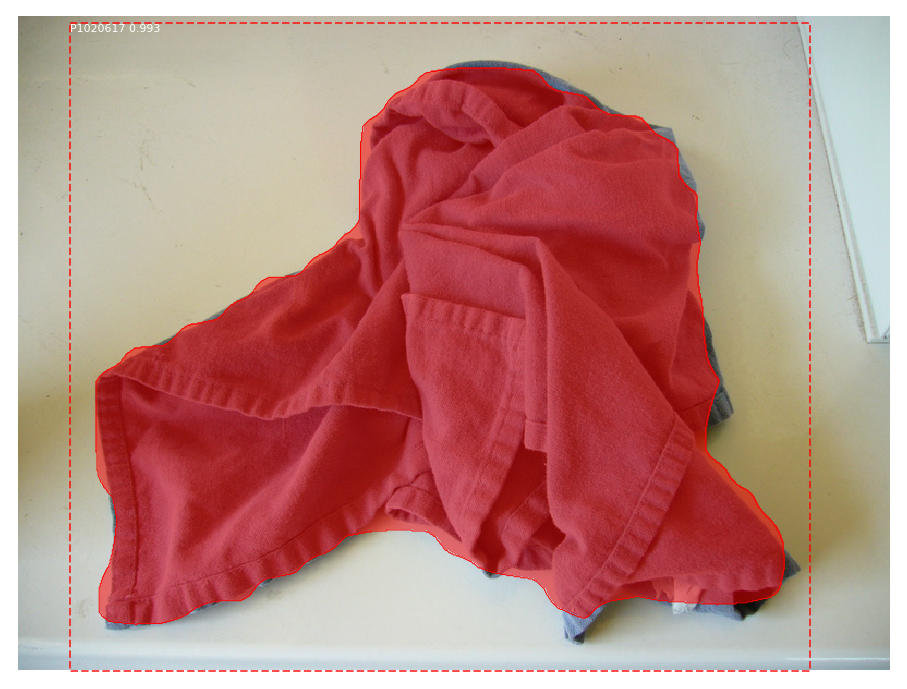

In [0]:
# show image with bounding boxes, masks, class labels and scores
display_instances(test_img, 
                  result['rois'], 
                  result['masks'], 
                  result['class_ids'], 
                  class_names, 
                  result['scores'])

### Inference and splash image

In [0]:
# Run inference directly using the file
# Generates a splash image
!python3 /content/homeobjects_mask_rcnn_bottle/bottle.py splash --weights=/content/drive/My\ Drive/MaskRCNNCoco/logs/bottle20200210T0428/mask_rcnn_bottle_0300.h5 --image=/content/homeobjects_mask_rcnn_bottle/dataset/train/P1020590.JPG

Using TensorFlow backend.
Weights:  /content/drive/My Drive/MaskRCNNCoco/logs/bottle20200210T0428/mask_rcnn_bottle_0300.h5
Dataset:  None
Logs:  /content/drive/My Drive/MaskRCNNCoco/logs

Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        50
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                114
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  5e-05
LOSS_WEIGHTS     